# Bank Marketing Analiza Dataseta

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

from pylab import rcParams
rcParams['figure.figsize'] = 5, 4

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 30)

## Učitavanje dataseta

In [4]:
df = pd.read_csv('data/bank-additional.csv', delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487.0,2.0,999,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346.0,4.0,999,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227.0,1.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17.0,3.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58.0,1.0,999,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


## Profil podataka: Raspodele, deskriptivne statistike, najčešće vrednosti, nedostajuće vrednosti

In [5]:
import pandas_profiling
df_profile = pandas_profiling.ProfileReport(df)
df_profile.to_file(outputfile='index.html')
print('Profile is saved in index.html')

Profile is saved in index.html


In [6]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays               int64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed        object
y                  object
dtype: object

In [7]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
count,4119.000000,4116.000000,4114.000000,4119.000000,4117.000000,4116.000000,4117.000000,4117.000000,4117.000000
mean,40.113620,256.869048,2.534273,960.422190,0.190430,0.084694,93.579540,-40.486358,4.858993
std,10.313362,254.763913,2.566673,191.922786,0.541904,1.563361,0.579442,4.639840,79.432456
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000
75%,47.000000,317.250000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,1.266000,5099.100000


In [8]:
df.describe(include=['object'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,nr.employed,y
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4118,4118
unique,12,4,8,3,3,3,2,10,5,3,12,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,5228.1,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,1625,3667


In [9]:
df['nr.employed'].value_counts()

5228.1    1625
5099.1     822
5191       758
5195.8     392
5076.2     164
5017.5     104
4991.6      87
4963.6      83
5008.7      60
5023.5      21
5176.3       1
no           1
Name: nr.employed, dtype: int64

In [10]:
df[df['nr.employed'] == 'no']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
780,32,blue-collar,married,basic.4y,no,no,yes,cellular,may,thu,80.0,4.0,999,0.0,nonexistent,-1.8,92.893,1.266,5099.1,no,NaN


In [11]:
df['nr.employed'] = df['nr.employed'].replace({'no' : df['nr.employed'].mode().values[0]})

In [12]:
df['nr.employed'] = df['nr.employed'].astype('float')

In [13]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4116.000000,4114.000000,4119.000000,4117.000000,4116.000000,4117.000000,4117.000000,4117.000000,4118.000000
mean,40.113620,256.869048,2.534273,960.422190,0.190430,0.084694,93.579540,-40.486358,4.858993,5166.498057
std,10.313362,254.763913,2.566673,191.922786,0.541904,1.563361,0.579442,4.639840,79.432456,73.669363
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.250000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,1.266000,5099.100000,5228.100000


## Korelacije

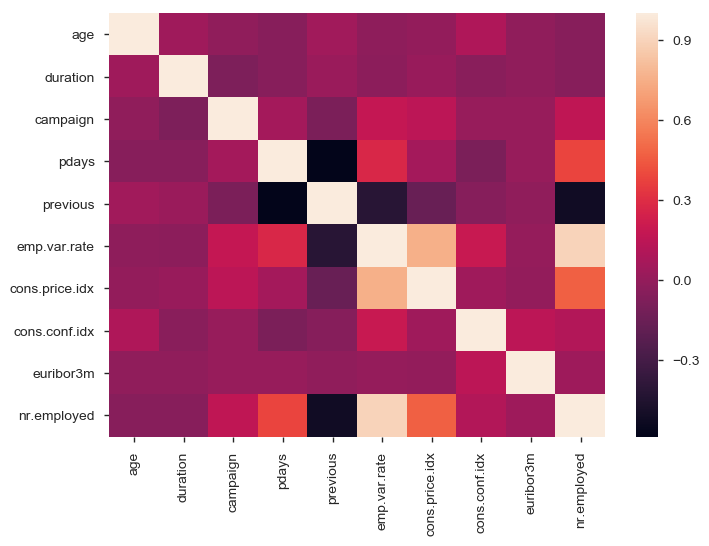

In [14]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] 
numeric_df = df.select_dtypes(include=numerics)

corr_matrix = numeric_df.corr(method='pearson')

sns.heatmap(corr_matrix)

## Vizualizacija podataka

In [15]:
df['calls'] = df['previous'] + df['campaign']

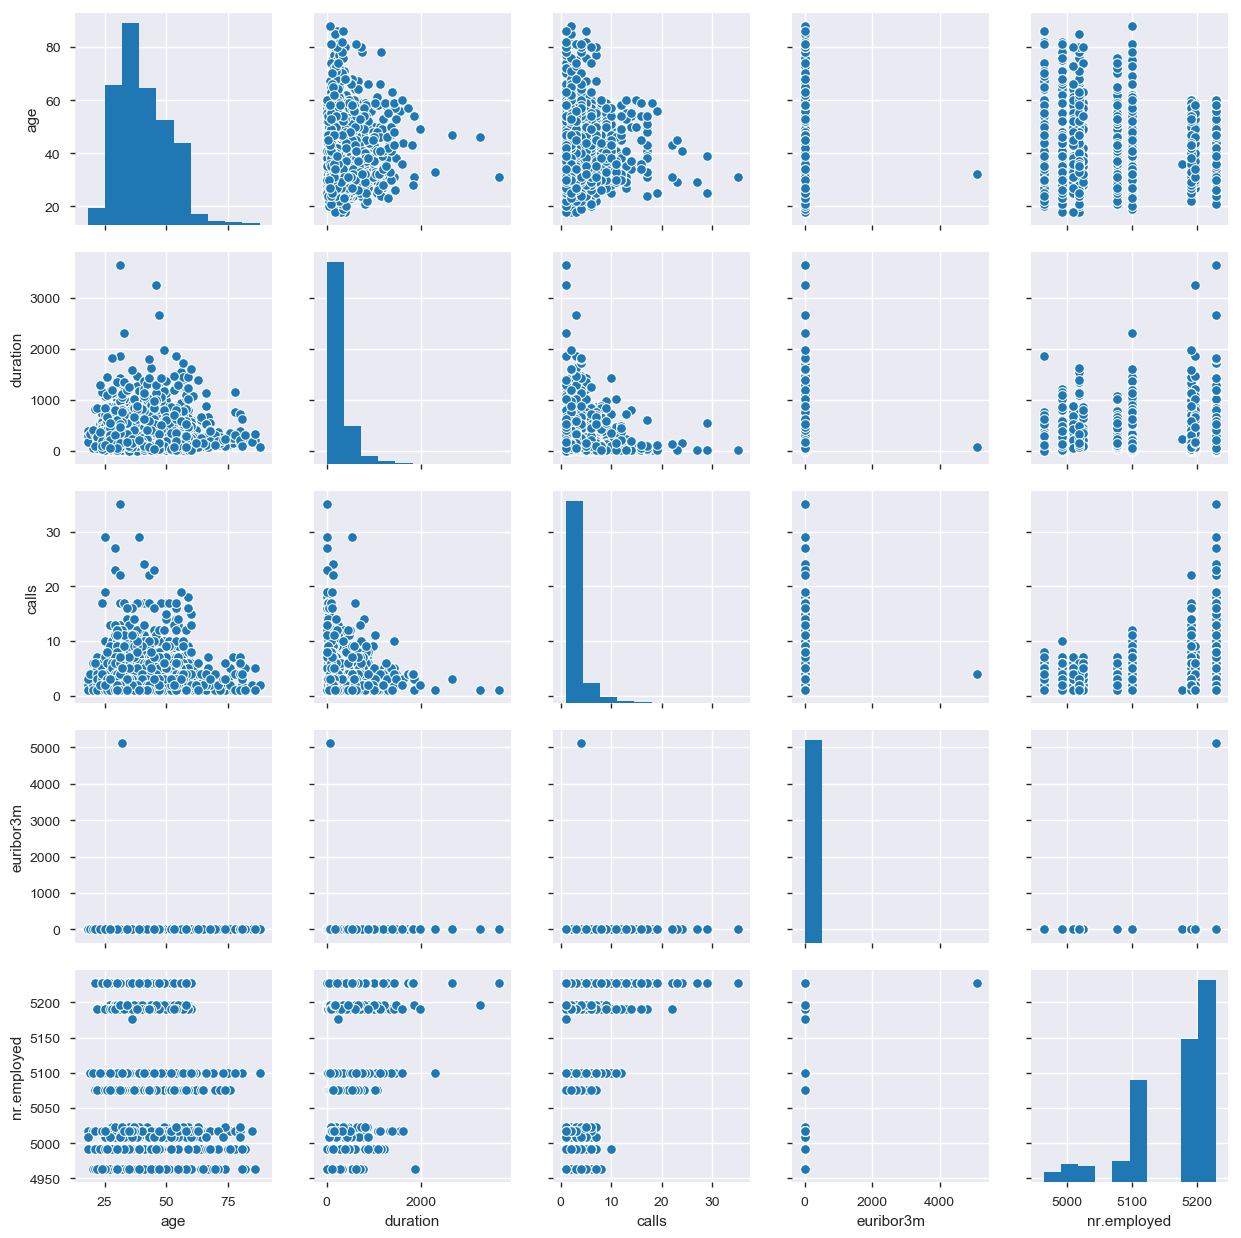

In [16]:
sns.pairplot(df[['age', 'duration', 'calls','euribor3m', 'nr.employed']]) 

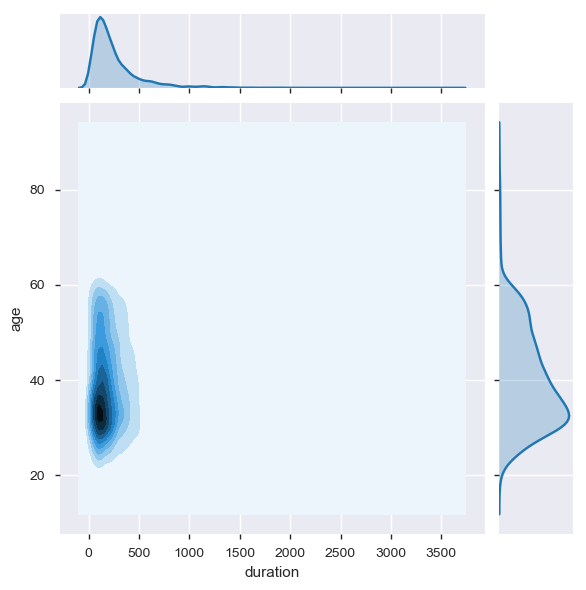

In [17]:
sns.jointplot(x='duration', y='age', data = df, kind = 'kde')

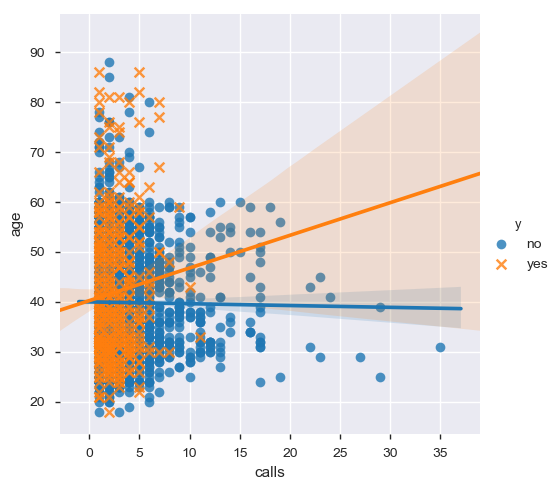

In [18]:
sns.lmplot('calls', 'age', data=df, hue='y', markers=["o", "x"])

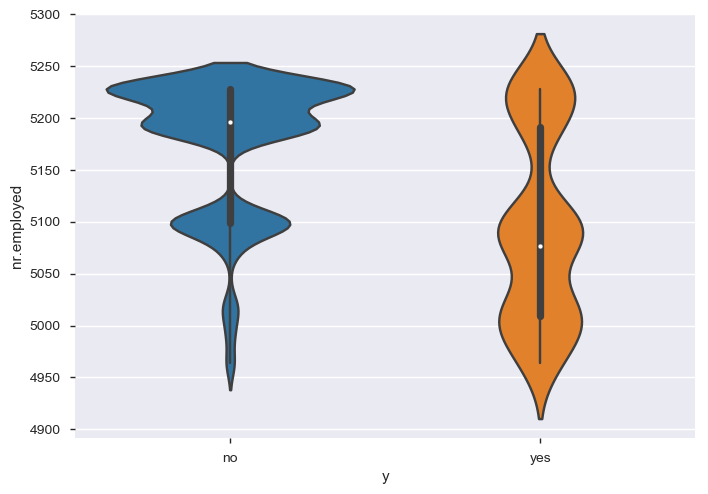

In [19]:
sns.violinplot(x='y', y='nr.employed', data=df)

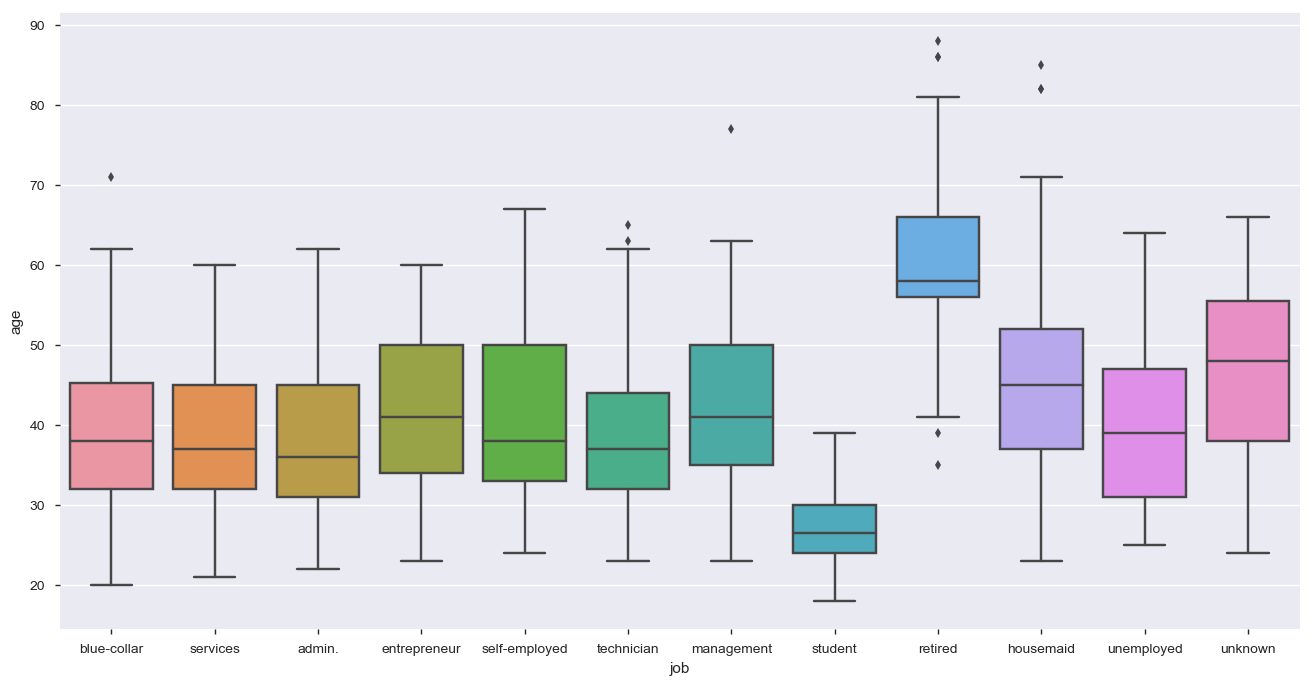

In [20]:
rcParams['figure.figsize'] = 16,8
sns.boxplot(x='job', y='age', data=df)

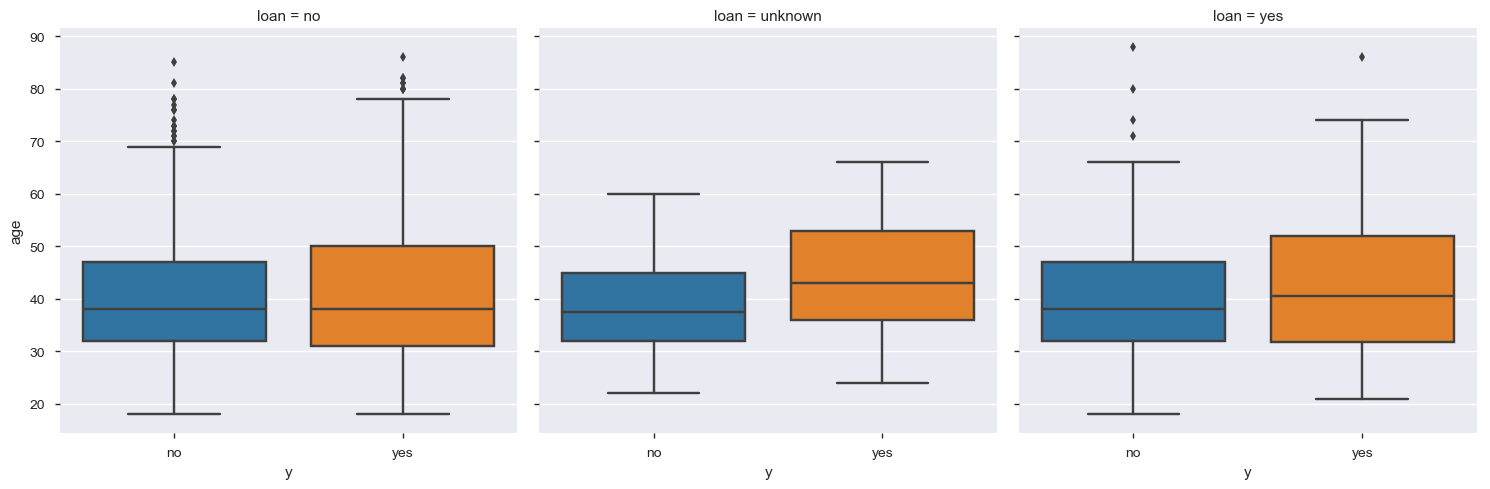

In [21]:
sns.catplot(x='y', y='age', col='loan', data=df, kind='box')

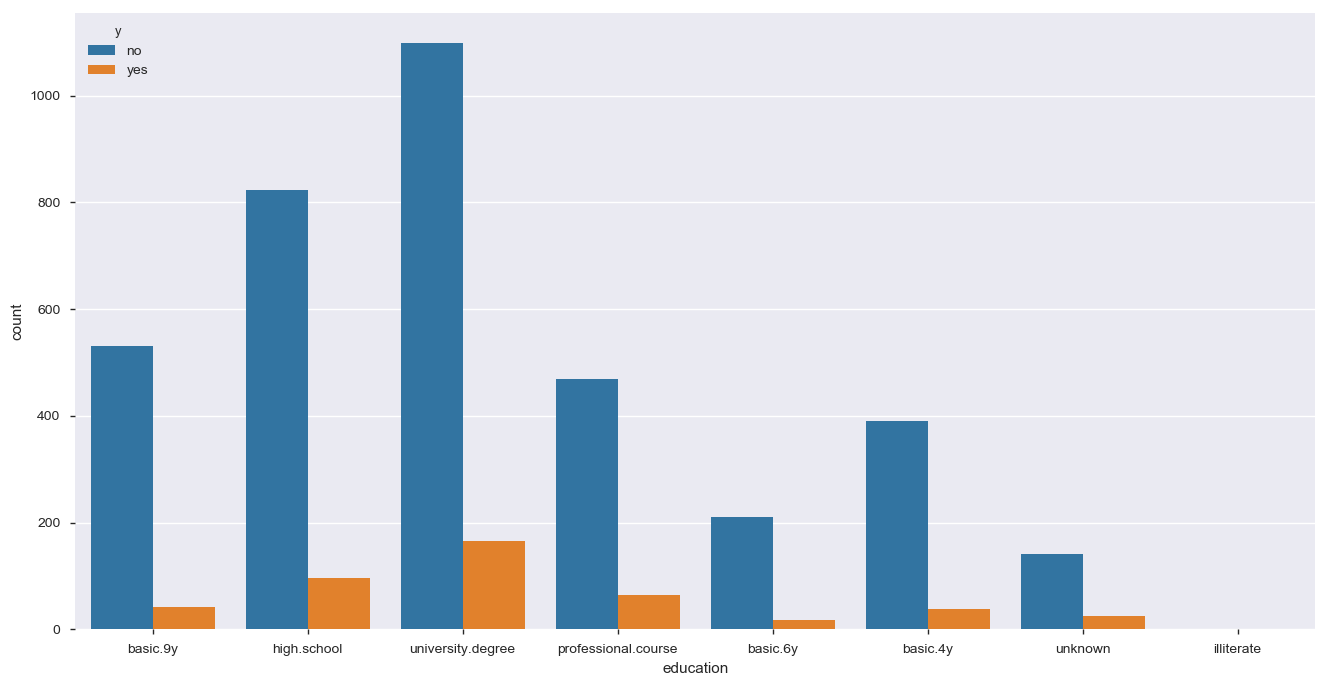

In [22]:
sns.countplot(x='education', hue='y', data=df)

In [23]:
pd.crosstab(df['y'], df['education'])

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
y,,,,,,,,
no,390,211,531,824,1,470,1099,141
yes,38,17,43,97,0,65,165,26


## Priprema podataka

### Popunjavanje nedostajućih vrednosti

In [24]:
df.isnull().sum().sum()

28

In [25]:
for col in list(df.columns):
    print(col, df[col].isnull().sum())

age 0
job 0
marital 0
education 0
default 0
housing 0
loan 0
contact 0
month 0
day_of_week 0
duration 3
campaign 5
pdays 0
previous 2
poutcome 0
emp.var.rate 3
cons.price.idx 2
cons.conf.idx 2
euribor3m 2
nr.employed 1
y 1
calls 7


In [26]:
df = df.dropna(subset=['y'])

In [27]:
df.drop(columns=['calls'], inplace=True)

In [28]:
econ_cols = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
for col in econ_cols:
    df[col] = df[col].fillna(df[col].mode().values[0])

In [29]:
df[df.previous.isnull()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
279,23,entrepreneur,married,university.degree,no,yes,no,cellular,aug,thu,87.0,1.0,999,NaN,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
625,27,services,single,high.school,unknown,no,no,cellular,jul,tue,509.0,4.0,999,NaN,nonexistent,1.4,93.918,-42.7,4.962,5228.1,yes


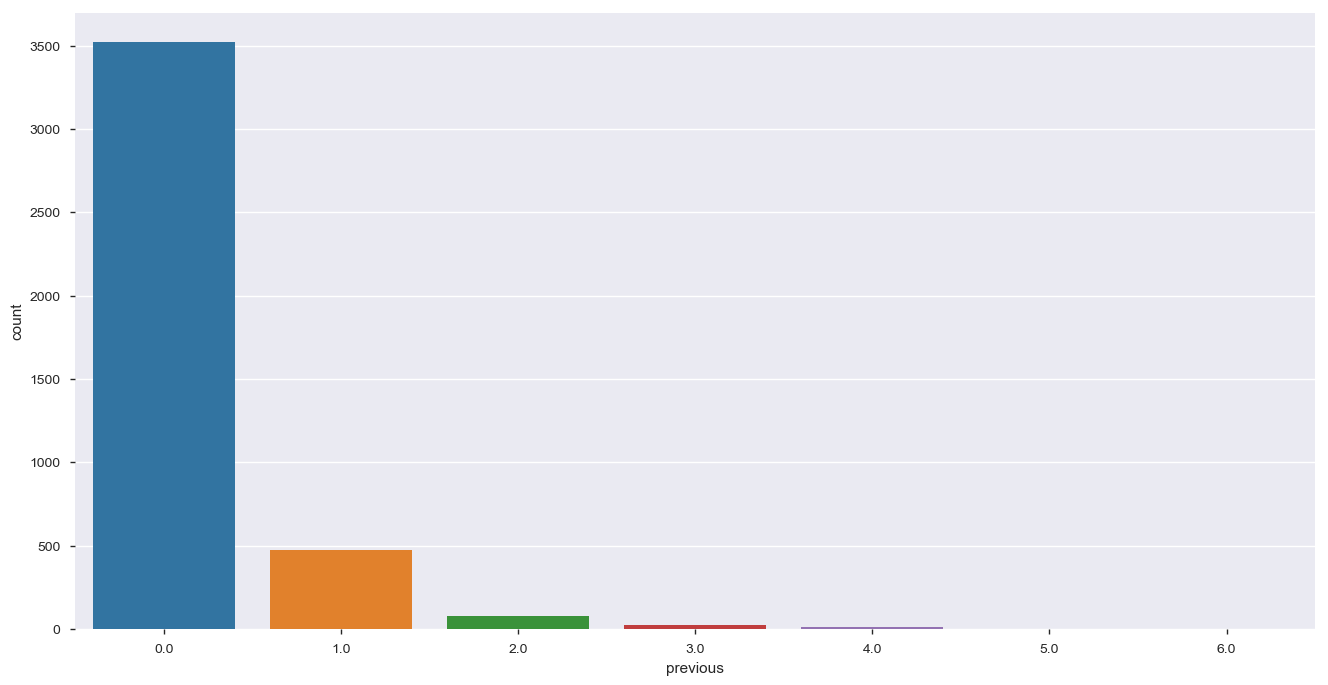

In [30]:
sns.countplot(x='previous', data=df)

In [31]:
df.previous = df.previous.fillna(0.0)

In [32]:
df[df.campaign.isnull()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
117,53,services,married,high.school,unknown,no,no,telephone,may,thu,203.0,NaN,999,0.0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
312,30,technician,married,university.degree,unknown,yes,no,telephone,may,wed,72.0,NaN,999,0.0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
375,31,technician,single,professional.course,no,unknown,unknown,cellular,aug,mon,202.0,NaN,999,0.0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
563,47,retired,married,basic.4y,unknown,unknown,unknown,telephone,may,wed,441.0,NaN,999,0.0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
687,42,blue-collar,married,basic.9y,unknown,no,no,telephone,may,fri,148.0,NaN,999,0.0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no


In [33]:
df.campaign.describe()

count    4113.000000
mean        2.533917
std         2.566883
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        35.000000
Name: campaign, dtype: float64

In [34]:
df.campaign = df.campaign.fillna(df.campaign.mode().values[0])

In [35]:
df[df.duration.isnull()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,NaN,1.0,999,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
149,40,admin.,divorced,university.degree,no,yes,no,cellular,aug,mon,NaN,1.0,999,0.0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
344,51,unknown,married,unknown,unknown,yes,no,cellular,aug,fri,NaN,5.0,999,0.0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no


In [36]:
df.duration.describe()

count    4115.000000
mean      256.912029
std       254.779948
min         0.000000
25%       103.000000
50%       181.000000
75%       317.500000
max      3643.000000
Name: duration, dtype: float64

In [37]:
df.duration = df.duration.fillna(df.duration.median())

In [38]:
df.isnull().sum().sum()

0

### Rad sa kategoričkim atributima

In [39]:
df.describe(include=['object'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,4118,4118,4118,4118,4118,4118,4118,4118,4118,4118,4118
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1012,2508,1264,3314,2175,3349,2651,1377,859,3522,3667


In [40]:
df.default.value_counts()

no         3314
unknown     803
yes           1
Name: default, dtype: int64

In [41]:
pd.crosstab(df['y'], df['default'])

default,no,unknown,yes
y,,,
no,2912,754,1
yes,402,49,0


In [42]:
df.drop(columns=['default'], inplace=True)

In [43]:
df.education.unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [44]:
education_mapping_dict = {
    'illiterate': 0,
    'unknown': 1,
    'basic.4y': 1,
    'basic.6y': 2,
    'basic.9y': 3,
    'high.school' : 4,
    'professional.course': 5,
    'university.degree': 6
}
df.education.replace(education_mapping_dict, inplace=True)

In [45]:
df.education.value_counts()

6    1264
4     921
1     595
3     574
5     535
2     228
0       1
Name: education, dtype: int64

In [46]:
df.month.unique()

array(['may', 'jun', 'nov', 'sep', 'jul', 'aug', 'mar', 'oct', 'apr',
       'dec'], dtype=object)

In [47]:
month_mapping_dict = {
    'mar': 3, 
    'apr': 4,
    'may': 5, 
    'jun': 6, 
    'jul': 7, 
    'aug': 8, 
    'sep': 9, 
    'oct': 10,
    'nov': 11,
    'dec': 12
}
df.month.replace(month_mapping_dict, inplace=True)

In [48]:
df.day_of_week.unique()

array(['fri', 'wed', 'mon', 'thu', 'tue'], dtype=object)

In [49]:
day_of_week_dict = {
    'mon': 1,
    'tue': 2,
    'wed': 3,
    'thu': 4,
    'fri': 5
}
df.day_of_week.replace(day_of_week_dict, inplace=True)

In [50]:
df.describe(include=['object'])

,job,marital,housing,loan,contact,poutcome,y
count,4118,4118,4118,4118,4118,4118,4118
unique,12,4,3,3,2,3,2
top,admin.,married,yes,no,cellular,nonexistent,no
freq,1012,2508,2175,3349,2651,3522,3667


In [51]:
df.marital.value_counts()

married     2508
single      1153
divorced     446
unknown       11
Name: marital, dtype: int64

In [52]:
df.housing.value_counts()

yes        2175
no         1838
unknown     105
Name: housing, dtype: int64

In [53]:
df.loan.value_counts()

no         3349
yes         664
unknown     105
Name: loan, dtype: int64

In [54]:
df.query('housing == \'unknown\'').describe(include=['object'])

,job,marital,housing,loan,contact,poutcome,y
count,105,105,105,105,105,105,105
unique,10,3,1,1,2,3,2
top,blue-collar,married,unknown,unknown,cellular,nonexistent,no
freq,28,68,105,105,62,86,96


In [55]:
df.query('housing == \'unknown\' and education < 4 and age < 30').shape

(4, 20)

In [56]:
df.query('housing == \'unknown\' and loan == \'unknown\'').shape

(105, 20)

In [57]:
df_cat = df[['marital', 'loan', 'housing']]

In [58]:
df_cat_dummies = pd.get_dummies(df[['marital', 'loan', 'housing']])
df_cat_dummies.drop(columns=['marital_unknown', 'loan_unknown', 'housing_unknown'], inplace=True)

In [59]:
df = pd.concat([df, df_cat_dummies], axis=1)
df.drop(columns=['marital', 'loan', 'housing'], inplace=True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4118 entries, 0 to 4118
Data columns (total 24 columns):
age                 4118 non-null int64
job                 4118 non-null object
education           4118 non-null int64
contact             4118 non-null object
month               4118 non-null int64
day_of_week         4118 non-null int64
duration            4118 non-null float64
campaign            4118 non-null float64
pdays               4118 non-null int64
previous            4118 non-null float64
poutcome            4118 non-null object
emp.var.rate        4118 non-null float64
cons.price.idx      4118 non-null float64
cons.conf.idx       4118 non-null float64
euribor3m           4118 non-null float64
nr.employed         4118 non-null float64
y                   4118 non-null object
marital_divorced    4118 non-null uint8
marital_married     4118 non-null uint8
marital_single      4118 non-null uint8
loan_no             4118 non-null uint8
loan_yes            4118 non-null

In [61]:
df.contact.value_counts()

cellular     2651
telephone    1467
Name: contact, dtype: int64

In [62]:
pd.crosstab(df['y'], df['poutcome'])

poutcome,failure,nonexistent,success
y,,,
no,387,3230,50
yes,67,292,92


In [63]:
df['contact_is_cellular'] = df.contact.replace({ 'cellular': 1, 'telephone': 0})
df['was_success'] = df.poutcome.replace({'success': 1, 'failure':0, 'nonexistent':0 })
df.drop(columns=['contact', 'poutcome'],inplace=True)

In [64]:
df_job_dummies = pd.get_dummies(df[['job']])
df = pd.concat([df, df_job_dummies], axis=1)
df.drop(columns=['job', 'job_unknown'], inplace=True)
df.head()

,age,education,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,marital_divorced,marital_married,marital_single,loan_no,loan_yes,housing_no,housing_yes,contact_is_cellular,was_success,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,30,3,5,5,487.0,2.0,999,0.0,-1.8,92.893,-46.2,1.313,5099.1,no,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0
1,39,4,5,5,346.0,4.0,999,0.0,1.1,93.994,-36.4,4.855,5191.0,no,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,25,4,6,3,227.0,1.0,999,0.0,1.4,94.465,-41.8,4.962,5228.1,no,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,38,3,6,5,17.0,3.0,999,0.0,1.4,94.465,-41.8,4.959,5228.1,no,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,47,6,11,1,58.0,1.0,999,0.0,-0.1,93.200,-42.0,4.191,5195.8,no,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0


In [65]:
df.shape

(4118, 34)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4118 entries, 0 to 4118
Data columns (total 34 columns):
age                    4118 non-null int64
education              4118 non-null int64
month                  4118 non-null int64
day_of_week            4118 non-null int64
duration               4118 non-null float64
campaign               4118 non-null float64
pdays                  4118 non-null int64
previous               4118 non-null float64
emp.var.rate           4118 non-null float64
cons.price.idx         4118 non-null float64
cons.conf.idx          4118 non-null float64
euribor3m              4118 non-null float64
nr.employed            4118 non-null float64
y                      4118 non-null object
marital_divorced       4118 non-null uint8
marital_married        4118 non-null uint8
marital_single         4118 non-null uint8
loan_no                4118 non-null uint8
loan_yes               4118 non-null uint8
housing_no             4118 non-null uint8
housing_yes     

### Izbacivanje izuzetaka

In [67]:
columns = ['age', 'campaign', 'duration']

In [68]:
df.shape

(4118, 34)

In [69]:
from scipy import stats

z = np.abs(stats.zscore(df[columns]))
df = df[(z < 3).all(axis=1)]
df.shape

(3913, 34)

# Klasifikacija

**Podela na trening i test podatke**

In [70]:
X = df.drop('y', axis=1)
y = df['y'].map({'yes':1, 'no': 0})

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [72]:
X_train.shape, y_train.shape

((2739, 33), (2739,))

In [73]:
X_test.shape, y_test.shape

((1174, 33), (1174,))

**Skaliranje podataka**

In [74]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [75]:
X_train

array([[-0.48857596, -0.04569999, -0.8220373 , ..., -0.14578339,
        -0.45454145, -0.17456815],
       [-0.69469218,  0.53113076, -0.34134555, ..., -0.14578339,
         2.20001938, -0.17456815],
       [ 1.67564434, -1.77619223,  0.1393462 , ..., -0.14578339,
        -0.45454145, -0.17456815],
       ...,
       [-0.48857596, -0.62253074,  0.1393462 , ..., -0.14578339,
        -0.45454145, -0.17456815],
       [-0.59163407,  1.1079615 , -0.8220373 , ..., -0.14578339,
        -0.45454145, -0.17456815],
       [-0.07634352, -0.04569999, -0.34134555, ..., -0.14578339,
        -0.45454145, -0.17456815]])

**Balansiranje podataka**

In [76]:
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(random_state=0)
X_train, y_train = under_sampler.fit_resample(X_train, y_train)


# from imblearn.over_sampling import SMOTE

# smote_over_sampler = SMOTE(random_state=0)
# X_train, y_train = smote_over_sampler.fit_sample(X_train, y_train.ravel())

In [77]:
X_train.shape

(558, 33)

**Modeli sa default parametrima**

In [78]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [79]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [80]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [81]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

**Evaluacija na trening skupu**

In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score

In [83]:
from prettytable import PrettyTable

def testiranje(models, scores, X_fun=X_train, y_fun=y_train):
    for model in models:
        print(str(model).split('(')[0])
        y_pred = model.predict(X_fun)
        t = PrettyTable(['Mera evaluacije', 'Rezultat'])
        for score in scores:
            s = score(y_fun, y_pred)
            t.add_row([str(score).split()[1], s])
        print(t)
        print('\n')

In [84]:
models = [model_lr, model_nb, model_tree, model_knn]
scores = [accuracy_score, precision_score, recall_score, roc_auc_score]

testiranje(models, scores, X_train, y_train)

LogisticRegression
+-----------------+--------------------+
| Mera evaluacije |      Rezultat      |
+-----------------+--------------------+
|  accuracy_score | 0.8530465949820788 |
| precision_score | 0.8456140350877193 |
|   recall_score  | 0.8637992831541219 |
|  roc_auc_score  | 0.853046594982079  |
+-----------------+--------------------+


GaussianNB
+-----------------+--------------------+
| Mera evaluacije |      Rezultat      |
+-----------------+--------------------+
|  accuracy_score | 0.7616487455197133 |
| precision_score | 0.8288288288288288 |
|   recall_score  | 0.6594982078853047 |
|  roc_auc_score  | 0.7616487455197133 |
+-----------------+--------------------+


DecisionTreeClassifier
+-----------------+----------+
| Mera evaluacije | Rezultat |
+-----------------+----------+
|  accuracy_score |   1.0    |
| precision_score |   1.0    |
|   recall_score  |   1.0    |
|  roc_auc_score  |   1.0    |
+-----------------+----------+


KNeighborsClassifier
+---------------

**Evaluacija na test skupu**

In [85]:
testiranje(models, scores, X_test, y_test)

LogisticRegression
+-----------------+--------------------+
| Mera evaluacije |      Rezultat      |
+-----------------+--------------------+
|  accuracy_score | 0.8568994889267462 |
| precision_score | 0.3514644351464435 |
|   recall_score  | 0.865979381443299  |
|  roc_auc_score  | 0.8610305449463478 |
+-----------------+--------------------+


GaussianNB
+-----------------+--------------------+
| Mera evaluacije |      Rezultat      |
+-----------------+--------------------+
|  accuracy_score | 0.8390119250425895 |
| precision_score | 0.2850467289719626 |
|   recall_score  | 0.6288659793814433 |
|  roc_auc_score  | 0.7434023490221979 |
+-----------------+--------------------+


DecisionTreeClassifier
+-----------------+---------------------+
| Mera evaluacije |       Rezultat      |
+-----------------+---------------------+
|  accuracy_score |  0.803236797274276  |
| precision_score | 0.27960526315789475 |
|   recall_score  |  0.8762886597938144 |
|  roc_auc_score  |  0.836473020704

**Evaluacija unakrsnom validacijom**

In [86]:
from sklearn.model_selection import cross_val_score

In [87]:
for model, label in zip([model_lr, model_nb, model_tree, model_knn], ['Logisticka regresija', 'Naive bayes','Stablo odlucivanja', 'K-NN']):
    scores = cross_val_score(model, X, y, cv=100, scoring='accuracy')
    print('[%s] Tacnost: %0.2f +/- %0.2f' % (label, scores.mean(), scores.std()))

[Logisticka regresija] Tacnost: 0.92 +/- 0.03
[Naive bayes] Tacnost: 0.87 +/- 0.05
[Stablo odlucivanja] Tacnost: 0.89 +/- 0.04
[K-NN] Tacnost: 0.91 +/- 0.04


### Klasifikacija - optimizacija parametara

**Logistička regresija**

In [88]:
from sklearn.model_selection import RandomizedSearchCV

params = {"penalty": ['l1', 'l2'],
          "C": stats.expon(scale=10)}

random_search = RandomizedSearchCV(LogisticRegression(), param_distributions=params,
                                   n_iter=100, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)

/home/jovan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'penalty': ['l1', 'l2'], 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7efbd00c1da0>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [89]:
random_search.best_params_

{'C': 0.4960680385400027, 'penalty': 'l1'}

In [90]:
model_lr_param = random_search.best_estimator_

In [91]:
testiranje([model_lr_param, model_lr], [accuracy_score, roc_auc_score, recall_score, precision_score], X_test, y_test)

LogisticRegression
+-----------------+---------------------+
| Mera evaluacije |       Rezultat      |
+-----------------+---------------------+
|  accuracy_score |  0.8560477001703578 |
|  roc_auc_score  |  0.8746374522585647 |
|   recall_score  |  0.8969072164948454 |
| precision_score | 0.35365853658536583 |
+-----------------+---------------------+


LogisticRegression
+-----------------+--------------------+
| Mera evaluacije |      Rezultat      |
+-----------------+--------------------+
|  accuracy_score | 0.8568994889267462 |
|  roc_auc_score  | 0.8610305449463478 |
|   recall_score  | 0.865979381443299  |
| precision_score | 0.3514644351464435 |
+-----------------+--------------------+




**Stablo odlučivanja**

In [92]:
from sklearn.model_selection import GridSearchCV, cross_val_score

params = {
    'criterion': ['entropy', 'gini'],
    'min_samples_leaf': range(1,30,3),
    'max_depth': range(2,16,2)
}

grid_searh = GridSearchCV(DecisionTreeClassifier(), params, cv=10, scoring='recall')
grid_searh.fit(X_train, y_train)

/home/jovan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['entropy', 'gini'], 'min_samples_leaf': range(1, 30, 3), 'max_depth': range(2, 16, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [93]:
grid_searh.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=13, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [94]:
model_tree_param = grid_searh.best_estimator_

In [95]:
testiranje([model_tree_param, model_tree], [accuracy_score, roc_auc_score, recall_score, precision_score], X_test, y_test)

DecisionTreeClassifier
+-----------------+--------------------+
| Mera evaluacije |      Rezultat      |
+-----------------+--------------------+
|  accuracy_score | 0.8066439522998297 |
|  roc_auc_score  | 0.8664723506494749 |
|   recall_score  | 0.9381443298969072 |
| precision_score | 0.2916666666666667 |
+-----------------+--------------------+


DecisionTreeClassifier
+-----------------+---------------------+
| Mera evaluacije |       Rezultat      |
+-----------------+---------------------+
|  accuracy_score |  0.803236797274276  |
|  roc_auc_score  |  0.8364730207047066 |
|   recall_score  |  0.8762886597938144 |
| precision_score | 0.27960526315789475 |
+-----------------+---------------------+




### Selekcija atributa

**Izbacivanje neinformativnih atributa**

In [96]:
from sklearn.feature_selection import VarianceThreshold

In [97]:
model = VarianceThreshold(threshold=0.1)
model.fit(X_train, y_train)
X_reduced = pd.DataFrame(model.transform(X_train), columns=X.columns[model.get_support()])
X_reduced.head()

,age,education,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,marital_divorced,marital_married,marital_single,loan_no,loan_yes,housing_no,housing_yes,contact_is_cellular,was_success,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,0.438947,-1.776192,2.062113,0.753710,-0.688406,-0.739117,0.203579,-0.358233,-0.115439,-0.650192,-0.330856,0.264895,0.402906,-0.350059,0.804378,-0.625349,0.483512,-0.440436,1.110078,-1.051334,0.735184,-0.192632,-0.577491,1.944249,-0.192632,-0.164306,-0.294796,-0.189553,-0.19567,-0.327966,-0.145783,-0.454541,-0.174568
1,-0.900808,-1.199361,-0.341346,0.042580,0.895956,-0.162517,0.203579,-0.358233,0.846979,1.532316,-0.287401,0.719947,0.842222,-0.350059,0.804378,-0.625349,0.483512,-0.440436,-0.900837,0.951172,-1.360204,-0.192632,-0.577491,1.944249,-0.192632,-0.164306,-0.294796,-0.189553,-0.19567,-0.327966,-0.145783,-0.454541,-0.174568
2,1.366470,-0.045700,0.620038,0.753710,-0.852671,-0.739117,0.203579,-0.358233,0.846979,-0.229218,0.951073,0.777694,0.842222,-0.350059,0.804378,-0.625349,0.483512,-0.440436,-0.900837,0.951172,0.735184,-0.192632,-0.577491,-0.514337,-0.192632,-0.164306,-0.294796,-0.189553,-0.19567,3.049097,-0.145783,-0.454541,-0.174568
3,-0.179402,-0.622531,0.139346,-0.668551,0.434954,0.990682,0.203579,-0.358233,0.846979,0.588575,-0.482950,0.776539,0.842222,-0.350059,0.804378,-0.625349,-2.068201,-0.440436,-0.900837,-1.051334,0.735184,-0.192632,-0.577491,1.944249,-0.192632,-0.164306,-0.294796,-0.189553,-0.19567,-0.327966,-0.145783,-0.454541,-0.174568
4,-0.797750,1.107962,0.620038,1.464841,-0.020749,-0.739117,0.203579,-0.358233,0.846979,-0.229218,0.951073,0.778849,0.842222,-0.350059,-1.243197,1.599107,0.483512,-0.440436,-0.900837,0.951172,0.735184,-0.192632,1.731629,-0.514337,-0.192632,-0.164306,-0.294796,-0.189553,-0.19567,-0.327966,-0.145783,-0.454541,-0.174568


In [98]:
X_reduced.shape

(558, 33)

In [99]:
model.get_support().sum()

33

In [100]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

best = SelectKBest(k=23, score_func=mutual_info_classif)
best.fit(X_reduced, y_train)

SelectKBest(k=23, score_func=<function mutual_info_classif at 0x7efbd3c5cb70>)

In [101]:
X_reduced = pd.DataFrame(best.transform(X_reduced), columns=X_reduced.columns[best.get_support()])
X_reduced.head()

,month,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,marital_divorced,marital_single,housing_no,contact_is_cellular,was_success,job_admin.,job_blue-collar,job_housemaid,job_management,job_retired,job_student,job_technician,job_unemployed
0,2.062113,-0.688406,-0.739117,0.203579,-0.358233,-0.115439,-0.650192,-0.330856,0.264895,0.402906,-0.350059,-0.625349,1.110078,0.735184,-0.192632,-0.577491,1.944249,-0.164306,-0.294796,-0.189553,-0.145783,-0.454541,-0.174568
1,-0.341346,0.895956,-0.162517,0.203579,-0.358233,0.846979,1.532316,-0.287401,0.719947,0.842222,-0.350059,-0.625349,-0.900837,-1.360204,-0.192632,-0.577491,1.944249,-0.164306,-0.294796,-0.189553,-0.145783,-0.454541,-0.174568
2,0.620038,-0.852671,-0.739117,0.203579,-0.358233,0.846979,-0.229218,0.951073,0.777694,0.842222,-0.350059,-0.625349,-0.900837,0.735184,-0.192632,-0.577491,-0.514337,-0.164306,-0.294796,-0.189553,-0.145783,-0.454541,-0.174568
3,0.139346,0.434954,0.990682,0.203579,-0.358233,0.846979,0.588575,-0.482950,0.776539,0.842222,-0.350059,-0.625349,-0.900837,0.735184,-0.192632,-0.577491,1.944249,-0.164306,-0.294796,-0.189553,-0.145783,-0.454541,-0.174568
4,0.620038,-0.020749,-0.739117,0.203579,-0.358233,0.846979,-0.229218,0.951073,0.778849,0.842222,-0.350059,1.599107,-0.900837,0.735184,-0.192632,1.731629,-0.514337,-0.164306,-0.294796,-0.189553,-0.145783,-0.454541,-0.174568


**Logisticka regresija sa redukovanim parametrima, za selekciju najinformativnijih atributa**

In [102]:
X_reduced.shape

(558, 23)

In [103]:
random_search.best_estimator_

LogisticRegression(C=0.4960680385400027, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [104]:
random_search.best_params_

{'C': 0.4960680385400027, 'penalty': 'l1'}

In [105]:
model_lr_reduced = LogisticRegression(C=random_search.best_params_['C'], 
                                      penalty=random_search.best_params_['penalty'])

model_lr_reduced

LogisticRegression(C=0.4960680385400027, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [106]:
model_lr_reduced.fit(X_reduced, y_train)

LogisticRegression(C=0.4960680385400027, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [107]:
(abs(model_lr_reduced.coef_) > 0.01).ravel()

array([False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True, False,  True,  True,  True])

In [108]:
X_reduced.columns[(abs(model_lr_reduced.coef_) > 0.01).ravel()].shape

(18,)

In [109]:
model_lr_reduced.coef_

array([[ 0.        ,  1.18465249, -0.12788424, -0.32827099, -0.03353759,
        -1.43844291,  0.70209569,  0.28034731,  0.        , -0.20363627,
        -0.0762768 ,  0.07908143,  0.0561674 ,  0.23119298,  0.        ,
         0.05415092,  0.        ,  0.04794514,  0.01728206,  0.        ,
        -0.0253423 ,  0.19004447,  0.09533907]])

In [110]:
cols = X_reduced.columns
cols = cols[(abs(model_lr_reduced.coef_) > 0.01).ravel()]

In [111]:
cols.shape

(18,)

In [112]:
cols

Index(['duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'nr.employed', 'marital_divorced',
       'marital_single', 'housing_no', 'contact_is_cellular', 'job_admin.',
       'job_housemaid', 'job_management', 'job_student', 'job_technician',
       'job_unemployed'],
      dtype='object')

In [113]:
X_reduced = X_reduced[cols]

In [114]:
from sklearn.model_selection import RandomizedSearchCV

params = {"penalty": ['l1', 'l2'],
          "C": stats.expon(scale=10)}

random_search = RandomizedSearchCV(LogisticRegression(), param_distributions=params,
                                   n_iter=100, cv=5, scoring='accuracy')
random_search.fit(X_reduced, y_train)

/home/jovan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'penalty': ['l1', 'l2'], 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7efbd0014160>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [115]:
model_lr_reduced = random_search.estimator
model_lr_reduced.fit(X_reduced, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [116]:
y_pred = model_lr_reduced.predict(pd.DataFrame(X_test, columns=X.columns)[cols])

In [117]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("ROC_AUC", roc_auc_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

Accuracy:  0.8594548551959114
ROC_AUC 0.8671136892283835
Recall: 0.8762886597938144
Precision: 0.35714285714285715


In [118]:
testiranje([model_lr_reduced], [accuracy_score, roc_auc_score, recall_score, precision_score], pd.DataFrame(X_test, columns=X.columns)[cols], y_test)
testiranje([model_lr_param], [accuracy_score, roc_auc_score, recall_score, precision_score], X_test, y_test)

LogisticRegression
+-----------------+---------------------+
| Mera evaluacije |       Rezultat      |
+-----------------+---------------------+
|  accuracy_score |  0.8594548551959114 |
|  roc_auc_score  |  0.8671136892283835 |
|   recall_score  |  0.8762886597938144 |
| precision_score | 0.35714285714285715 |
+-----------------+---------------------+


LogisticRegression
+-----------------+---------------------+
| Mera evaluacije |       Rezultat      |
+-----------------+---------------------+
|  accuracy_score |  0.8560477001703578 |
|  roc_auc_score  |  0.8746374522585647 |
|   recall_score  |  0.8969072164948454 |
| precision_score | 0.35365853658536583 |
+-----------------+---------------------+




## Klasterovanje

In [119]:
from sklearn.preprocessing import MinMaxScaler

df_scaled = df.copy()

In [120]:
df_scaled['y'] = df_scaled['y'].map({'yes':1, 'no': 0})

In [121]:
X_scaled = df_scaled.drop('y', axis=1)
min_max = MinMaxScaler()
min_max.fit(X_scaled)
X_scaled = min_max.transform(X_scaled)

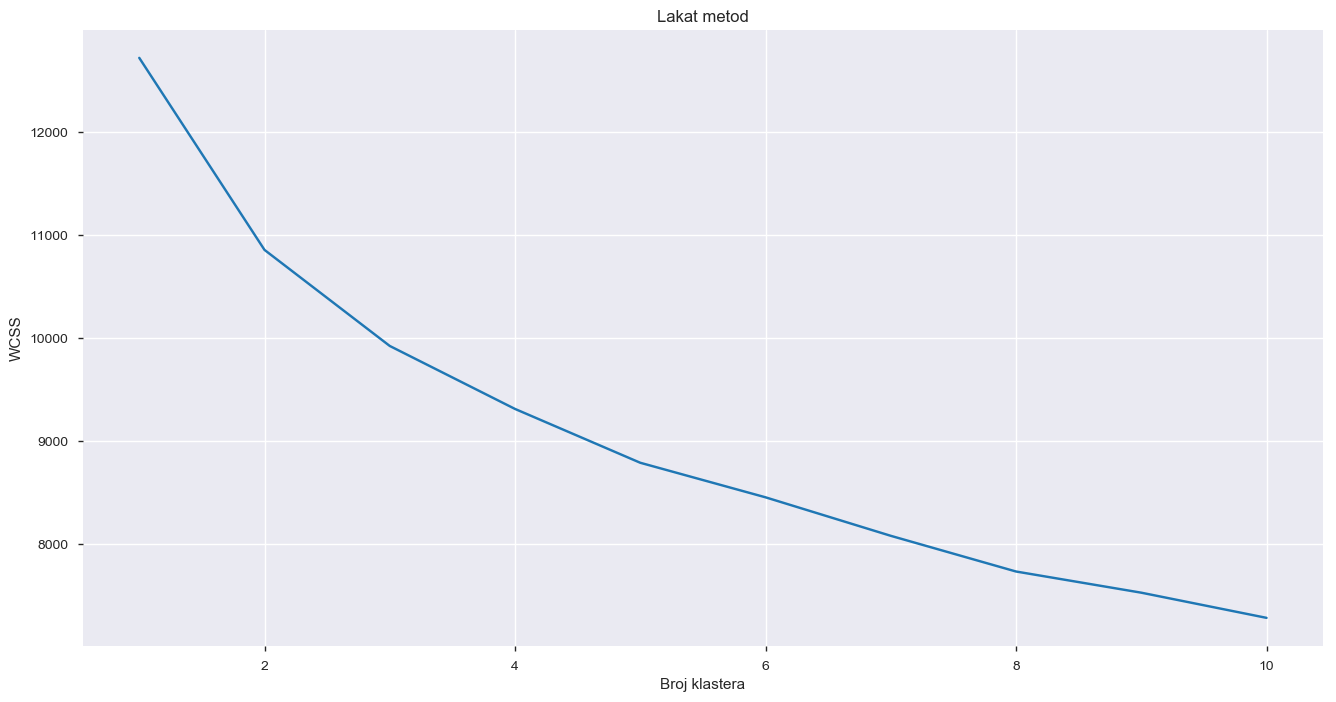

In [122]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Lakat metod')
plt.xlabel('Broj klastera')
plt.ylabel('WCSS')
plt.show()

In [123]:
wcss[2]

9921.600678774083

In [124]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [125]:
y_pred = kmeans.predict(X_scaled)

In [126]:
df_scaled['cluster'] = y_pred

In [127]:
df_scaled['cluster'].value_counts()

0    1524
1    1291
2    1098
Name: cluster, dtype: int64

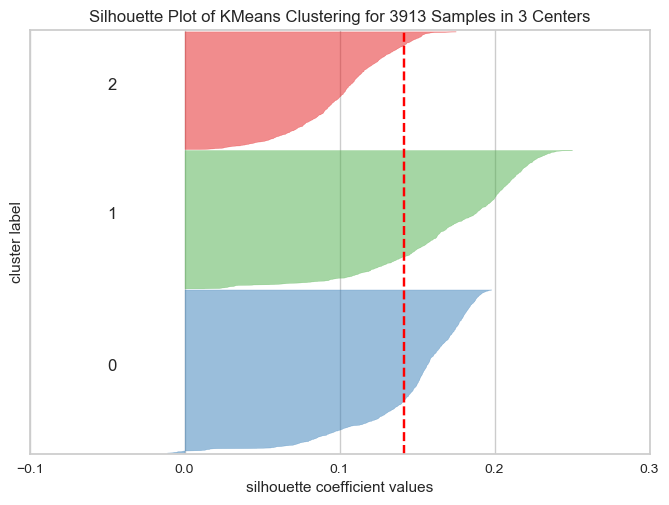

In [128]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(X_scaled)
visualizer.poof()

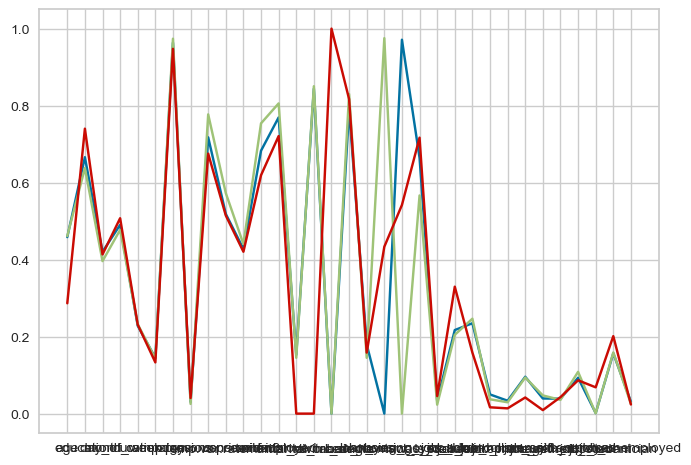

In [129]:
plt.close()
plt.plot(kmeans.cluster_centers_[0], c = 'b')
plt.plot(kmeans.cluster_centers_[1], c = 'g')
plt.plot(kmeans.cluster_centers_[2], c = 'r')
plt.xticks(list(range(33)), df_scaled.drop(['y','cluster'],axis=1).columns)
plt.show()

In [138]:
df_scaled.drop(['y','cluster'],axis=1).columns

Index(['age', 'education', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'marital_divorced', 'marital_married',
       'marital_single', 'loan_no', 'loan_yes', 'housing_no', 'housing_yes',
       'contact_is_cellular', 'was_success', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed'],
      dtype='object')

In [130]:
X0 = df_scaled[df_scaled['cluster'] == 0].drop('cluster', axis=1)
X1 = df_scaled[df_scaled['cluster'] == 1].drop('cluster', axis=1)
X2 = df_scaled[df_scaled['cluster'] == 2].drop('cluster', axis=1)

In [131]:
y0 = X0['y']
y1 = X1['y']
y2 = X2['y']

In [132]:
X0 = X0.drop('y', axis=1)
X1 = X1.drop('y', axis=1)
X2 = X2.drop('y', axis=1)

In [133]:
from sklearn.linear_model import LogisticRegression

lr0 = LogisticRegression()
lr0.fit(X0, y0)

lr1 = LogisticRegression()
lr1.fit(X1, y1)

lr2 = LogisticRegression()
lr2.fit(X2, y2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [134]:
testiranje([lr0, lr1, lr2, model_lr_param], [accuracy_score, roc_auc_score, recall_score, precision_score], X_test, y_test)

LogisticRegression
+-----------------+--------------------+
| Mera evaluacije |      Rezultat      |
+-----------------+--------------------+
|  accuracy_score | 0.6737649063032368 |
|  roc_auc_score  | 0.6955508332615418 |
|   recall_score  | 0.7216494845360825 |
| precision_score | 0.1643192488262911 |
+-----------------+--------------------+


LogisticRegression
+-----------------+--------------------+
| Mera evaluacije |      Rezultat      |
+-----------------+--------------------+
|  accuracy_score | 0.5826235093696763 |
|  roc_auc_score  | 0.6224238769395706 |
|   recall_score  | 0.6701030927835051 |
| precision_score | 0.124282982791587  |
+-----------------+--------------------+


LogisticRegression
+-----------------+---------------------+
| Mera evaluacije |       Rezultat      |
+-----------------+---------------------+
|  accuracy_score |  0.5672913117546848 |
|  roc_auc_score  |  0.5765442380036183 |
|   recall_score  |  0.5876288659793815 |
| precision_score | 0.108571428